In [41]:
#Importing Utility Classes
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Splitting data and creating model libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid

#_Printing the first few rows of the DataFrame df.
df = pd.read_csv('drug200.csv')
df.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


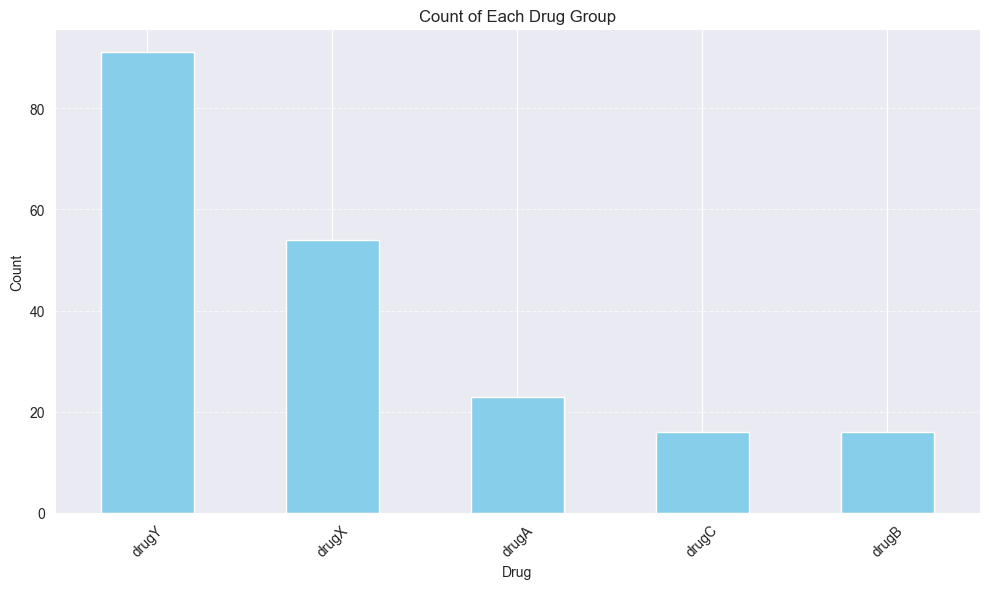

In [32]:
drug_counts = df['Drug'].value_counts()
# Plotting the bar graph
plt.figure(figsize=(10, 6))
drug_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Each Drug Group')
plt.xlabel('Drug')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


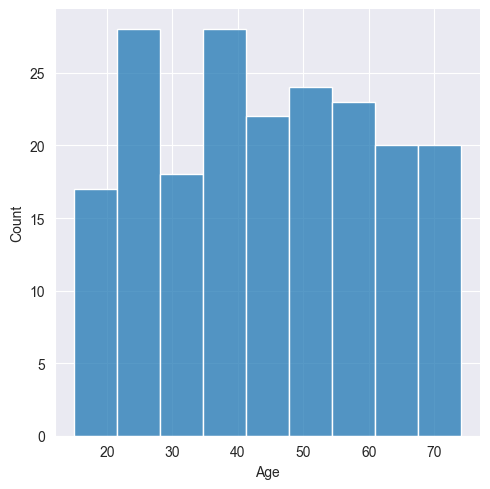

In [34]:
sns.displot(df['Age'])

In [35]:
#Preparing the Train data for the Modal
#Sex
df["Sex"] = df["Sex"].replace("M",1)
df["Sex"] = df["Sex"].replace("F",2)
#BP
df["BP"] = df["BP"].replace("LOW",1)
df["BP"] = df["BP"].replace("NORMAL",2)
df["BP"] = df["BP"].replace("HIGH",3)
#Cholesterol
df["Cholesterol"] = df["Cholesterol"].replace("LOW",1)
df["Cholesterol"] = df["Cholesterol"].replace("NORMAL",2)
df["Cholesterol"] = df["Cholesterol"].replace("HIGH",3)
#DRUG
df["Drug"] = df["Drug"].replace("drugY",1)
df["Drug"] = df["Drug"].replace("drugC",2)
df["Drug"] = df["Drug"].replace("drugX",3)
df["Drug"] = df["Drug"].replace("drugA",4)
df["Drug"] = df["Drug"].replace("drugB",5)

df.head()


C:\Users\Tayyab Anees\AppData\Local\Temp\ipykernel_33376\2536690081.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace("F",2)
C:\Users\Tayyab Anees\AppData\Local\Temp\ipykernel_33376\2536690081.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["BP"] = df["BP"].replace("HIGH",3)
C:\Users\Tayyab Anees\AppData\Local\Temp\ipykernel_33376\2536690081.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly cal

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,3,3,25.355,1
1,47,1,1,3,13.093,2
2,47,1,1,3,10.114,2
3,28,2,2,3,7.798,3
4,61,2,1,3,18.043,1


In [36]:
# Splitting features and target variable
X = df.drop(columns=['Drug'])  # Features
y = df['Drug']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
y_train.head()

79     3
197    3
38     3
24     1
122    1
Name: Drug, dtype: int64

In [38]:
X_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,2,1,2,10.840
197,52,1,2,3,9.894
38,39,2,2,2,9.709
24,33,2,1,3,33.486
122,34,1,2,3,22.456


In [39]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Building the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=6, activation='softmax'))  # Output layer with softmax for multi-class classification

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

C:\Users\Tayyab Anees\OneDrive\Desktop\OR PROJECT\pythonProject4\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  the output of the layer (its "activation").


In [45]:
# Evaluating the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test,verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Test Loss: 0.11488501727581024
Test Accuracy: 0.9750000238418579


In [46]:
#Saving the Model
model.save("Drug_Model.keras")

In [47]:
#Test With a Single Input
single_input = np.array([[23, 2, 3, 3, 25.335]])
preprocessed_input = scaler.transform(single_input)
predictions = model.predict(preprocessed_input)
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted class: 1


C:\Users\Tayyab Anees\OneDrive\Desktop\OR PROJECT\pythonProject4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [52]:
#Test With a Single Input
single_input = np.array([[68, 2, 3, 2, 10.189]])
preprocessed_input = scaler.transform(single_input)
predictions = model.predict(preprocessed_input)
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: 5


C:\Users\Tayyab Anees\OneDrive\Desktop\OR PROJECT\pythonProject4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
